<h1>Problem Statement</h1>

Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. 

Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<h2>My Hypotheses</h2>

<li>Applicants who have been employed for longer terms will have better interest rates</li>
<li>Applicants with verified income will have better interest rates</li>
<li>Home owners will have better interest rates than non-home owners</li>
<li>Higher earners will have better interest rates</li>

In [69]:
#import the train and test datasets and review the data structure
train = pd.read_csv('train_fNxu4vz.csv')
test = pd.read_csv('test_fjtUOL8.csv')

#copy the data frames
train_original = train.copy()
test_original = test.copy()

In [70]:
#check shape of the data frames
train.shape, test.shape

((164309, 14), (109541, 13))

In [71]:
train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [72]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [73]:
train.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [74]:
#convert loan amount requested to float
train['Loan_Amount_Requested'] = train.loc[:,'Loan_Amount_Requested'].str.replace(',','').astype(float)
#do the same on test data set
test['Loan_Amount_Requested'] = test.loc[:,'Loan_Amount_Requested'].str.replace(',','').astype(float)

<h3>Analyze Variables</h3>
I'll review the frequency and distribution of variables

In [75]:
train['Interest_Rate'].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

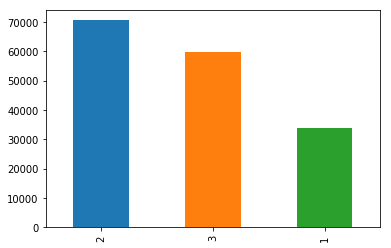

In [76]:
#plot a graph of distribution of interest rates
train['Interest_Rate'].value_counts().plot.bar()

In [77]:
train['Interest_Rate'].value_counts(normalize=True)

2    0.429557
3    0.364697
1    0.205746
Name: Interest_Rate, dtype: float64

About 43% of applicants fall under category 2, followed by category 3 with 36% of applicants then category 1 with 20% of applicants

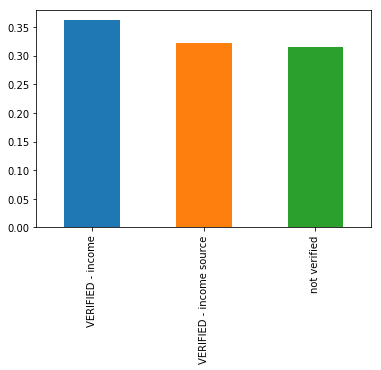

In [78]:
#check distribution of income_verified
train['Income_Verified'].value_counts(normalize=True).plot.bar()

In [79]:
#let's combine the 2 verified income categories into one by removing the word 'source'
train['Income_Verified']=train.loc[:,'Income_Verified'].str.replace(' source','')

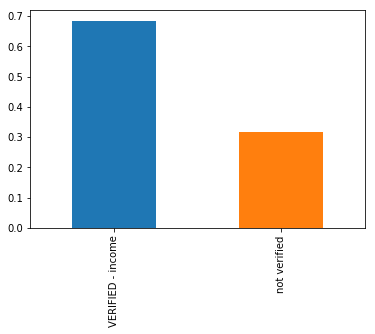

In [80]:
train['Income_Verified'].value_counts(normalize=True).plot.bar()

almost 70% of applicants have a verified income source

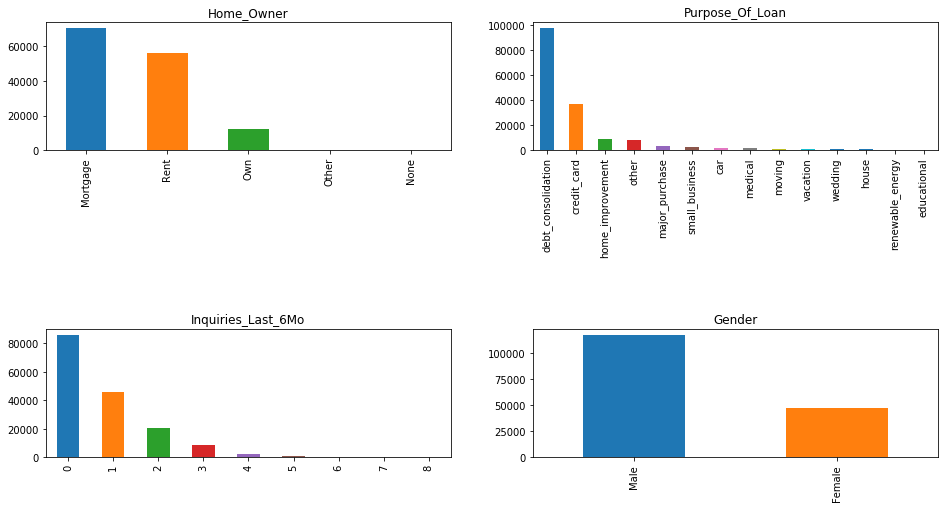

In [81]:
plt.figure(1)

plt.subplot(321)
train['Home_Owner'].value_counts().plot.bar(figsize=(16,8),title='Home_Owner')

plt.subplot(322)
train['Purpose_Of_Loan'].value_counts().plot.bar(figsize=(16,8),title='Purpose_Of_Loan')

plt.subplot(325)
train['Inquiries_Last_6Mo'].value_counts().plot.bar(figsize=(16,8),title='Inquiries_Last_6Mo')    

plt.subplot(326)
train['Gender'].value_counts().plot.bar(figsize=(16,8),title='Gender')


plt.show()


<li>most applicants have morgages, followed closely by renters with a significantly lower number of full home owners</li>
<li>most applicants request loans for debt consolidation, with credit card requests following distantly</li>
<li>most applicants have 0 inquiries in the last 6 months</li>
<li>there are twice the number of male applicants than female</li>

In [82]:
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

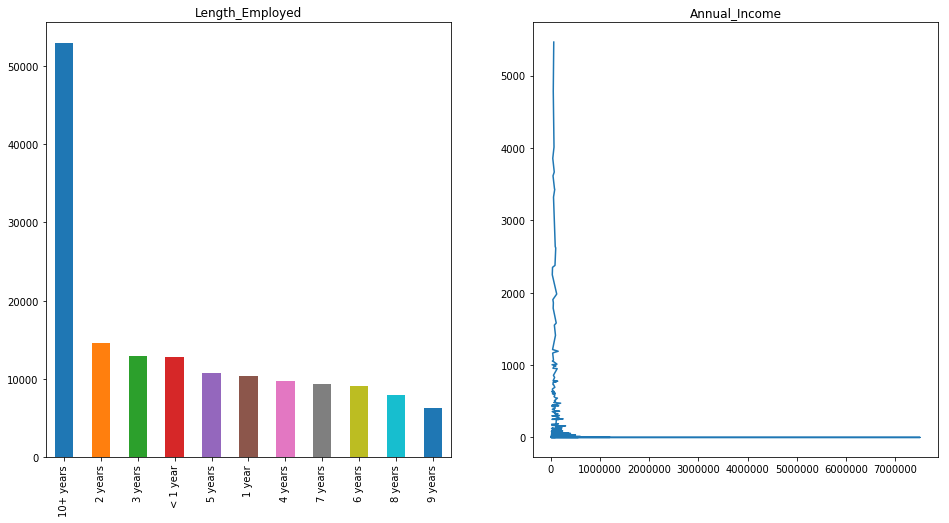

In [83]:
plt.figure(1)

plt.subplot(121)
train['Length_Employed'].value_counts().plot.bar(figsize=(16,8),title='Length_Employed')

plt.subplot(122)
train['Annual_Income'].value_counts().plot.line(figsize=(16,8),title='Annual_Income')



In [84]:
#I'll replace nulls in length employed with the mode
train['Length_Employed'].fillna(train['Length_Employed'].mode()[0], inplace=True)


In [85]:
#change values in length employed to numerical
train.replace({'Length_Employed': {'1 year': 1,
                                     '2 years':2,
                                     '3 years':3,
                                     '4 years': 4,
                                      '5 years': 5,
                                     '6 years': 6,
                                     '7 years':7,
                                     '8 years':8,
                                     '9 years':9,
                                     '< 1 year':0,
                                      '10+ years':10}},inplace=True)

In [86]:
#repeat for test data set
test['Length_Employed'].fillna(test['Length_Employed'].mode()[0], inplace=True)
#change values in length employed to numerical
test.replace({'Length_Employed': {'1 year': 1,
                                     '2 years':2,
                                     '3 years':3,
                                     '4 years': 4,
                                      '5 years': 5,
                                     '6 years': 6,
                                     '7 years':7,
                                     '8 years':8,
                                     '9 years':9,
                                     '< 1 year':0,
                                      '10+ years':10}},inplace=True)

In [87]:
train['Home_Owner'].fillna(train['Home_Owner'].mode()[0], inplace=True)
test['Home_Owner'].fillna(test['Home_Owner'].mode()[0], inplace=True)

In [88]:
train['Annual_Income'].fillna(train['Annual_Income'].mode()[0], inplace=True)
test['Annual_Income'].fillna(test['Annual_Income'].mode()[0], inplace=True)

In [89]:
#i'll drop months since delinquency column because there are too many null values: more than half
train = train.drop('Months_Since_Deliquency',axis=1)

In [90]:
test = test.drop('Months_Since_Deliquency',axis=1)

In [91]:
train.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

<h2>Build Models for Prediction</h2>

In [92]:
from sklearn.model_selection import train_test_split

X = train.drop('Loan_ID', axis =1)
y = train['Interest_Rate']
test = test.drop('Loan_ID', axis =1)



In [93]:
X = pd.get_dummies(X)
test = pd.get_dummies(test)

In [94]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=1,test_size=0.2)

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
RandomForest = RandomForestRegressor(random_state=1, n_estimators=500)
RandomForest.fit(X_train,y_train)
pred_RF = RandomForest.predict(X_valid)
mae = mean_absolute_error(pred_RF,y_valid)
print(mae)

In [ ]:
X_train.head()

In [ ]:
submission = pd.read_csv('sample_submission_HSqiq1Q.csv')

In [ ]:
#run prediction on test data set
pred_test = RandomForest.predict(test)

In [ ]:
submission['Interest_Rate']=pred_test            # filling interest rate with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Interest_Rate']).to_csv('random_forest.csv', index=False)